In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img

import warnings
warnings.filterwarnings('ignore')

<h2>Требования к анализу:</h2>


- Исследовать данные

- Отчет сделать в формате storytelling: дополнить каждый график письменными выводами и наблюдениями

- Оформить каждую визуализацию должным образом (график читается даже в отрыве от контекста)

In [84]:
datain = pd.read_csv('Employee.csv')

In [85]:
datain.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [86]:
datain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [87]:
datain.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [88]:
categorial = datain.select_dtypes(include=['object'])

categorial.describe()

,Education,City,Gender,EverBenched
count,4653,4653,4653,4653
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,3601,2228,2778,4175


-------------------------------------------------------------------------------------------------------------------------------
<h4>1. Проведем анализ качества сырых данных

 <h5>1. Данные содержат 4653 записи по 9 признакам, без пропусков.</h5>
 
 <h5>2. Все признаки номенативные (качественные):</h5>
 
- Бинарные признаки:

LeaveOrNot - (1/0) Целевой признак. Факт увольнения из компании.

EverBenched - (Yes/No). Факт проведенной аттестации

Gender - (Male/Female) Пол сотрудника

- Атрибутивные признаки:

City, Education

 - Порядковые:

Age, JoiningYear, PaymentTier, ExperienceInCurrentDomain

 <h5>3. Аномалий данных при первичном статистическом анализе признаков не выявлено:</h5>
 Далее проведем визуальный анализ для оценки наличия выбросов и аномалий.
 
 

<h5>Распределение целевого признака:</h5>

In [172]:
counts = datain['LeaveOrNot'].value_counts()

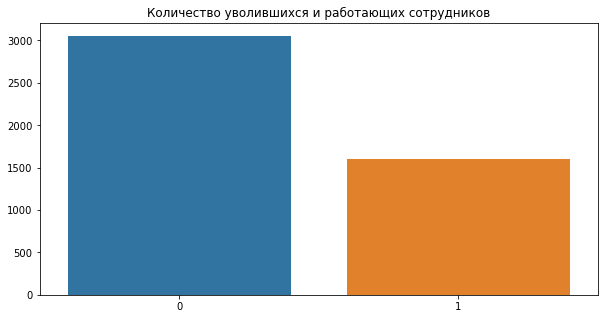

In [174]:
plt.figure(figsize=(10, 5))
plt.title('Количество уволившихся и работающих сотрудников')
hist = sns.barplot(counts.index, counts.values)
plt.show()

<h5>Видим количество и соотношение уволившихся сотрудников (когда - либо) и работающих</h5>

Рассмотрим распределение целевого признака в разрезе категорий пол / образование:

In [151]:
table = pd.pivot_table(datain[['Education', 'Gender', 'LeaveOrNot', 'Age']], \
                       values='LeaveOrNot', index = ['Gender'], columns=['Education'],\
                       aggfunc=lambda x: sum(x)/datain.LeaveOrNot.sum())

In [152]:
table

Education,Bachelors,Masters,PHD
Gender,,,
Female,0.436250,0.10500,0.011250
Male,0.269375,0.16125,0.016875


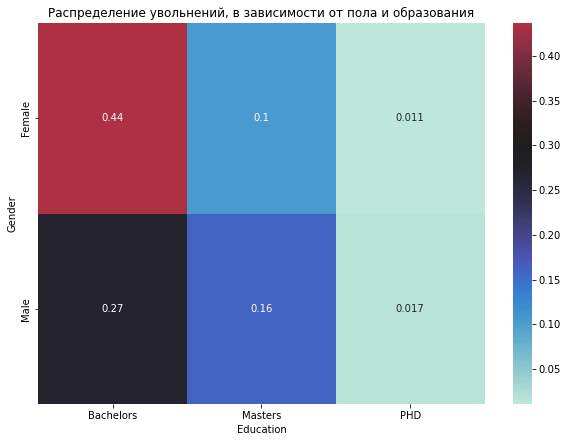

In [161]:
plt.figure(figsize=(10, 7))
plt.title('Распределение увольнений, в зависимости от пола и образования')
sns.heatmap(table, annot=True, center=0.3)
plt.show()

<h5> Из тепловой диаграммы можем сделать промежуточные выводы:</h5>
    
    - 44% уволившихся женщины с степенью бакалавра
    
    - 27% уволившихся мужчины с степенью бакалавра
    
    - 16% уволившихся мужчины с стеенью специалиста
    
    - 10% уволившихся женщины с стеенью специалиста
    
    1. Доля женщин средии уволившихся выше. Особенно среди бакалавров.
    2. Доля уволившихся мужчин выше среди специалистов.
    
Для первичной оценки информации также выясним какое распределение полов в целом в компании.

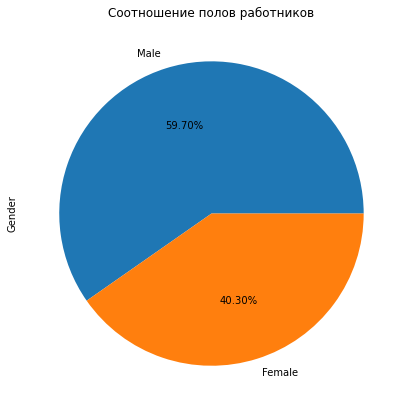

In [170]:
plt.figure(figsize=(10, 7))
plt.title('Соотношение полов работников')
datain['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

<h5> Соотношение полов в компании: </h5>
 - Женщин меньше на 19.4%
 
То есть, не смотря на то, что женщин меньше в общем числе, они увольняются в среднем чаще чем мужчины. 
Особенно большая разница среди бакалавров.

In [171]:
datain.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<h5>Далее рассмотрим влияние возраста на увольнение, в зависимости от пола:</h5>

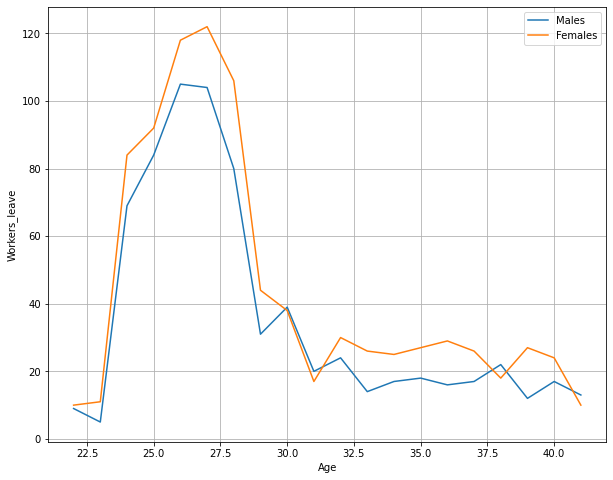

In [287]:
plt.figure(figsize=(10, 8))
ages = datain[datain.Gender == 'Male'][['Age', 'LeaveOrNot']] \
                .groupby(['Age'], as_index=False).sum()\
                .rename(columns={'LeaveOrNot': 'Workers_leave'})

ages2 = datain[datain.Gender == 'Female'][['Age', 'LeaveOrNot']] \
                .groupby(['Age'], as_index=False).sum()\
                .rename(columns={'LeaveOrNot': 'Workers_leave'})
sns.lineplot(x= ages['Age'], y= ages['Workers_leave'], label='Males')
sns.lineplot(x= ages2['Age'], y= ages2['Workers_leave'], label='Females')
plt.grid()
plt.show()

<h5> Из графика делаем вывод: <h5>
    
    - Есть общая тенденция к увольнению сотрудников в возрасте 23 - 31 год
    
    - Формы графиков по гендеру практически совпадают - не видно существенных различий в
    поведении возрастных групп в зависимости от пола. 

<h5> Построим графики:</h5>

    - распределения средней зарплаты в зависимости от возраста и пола
    - распределения среднего показателя опыта в зависимости от возраста и пола

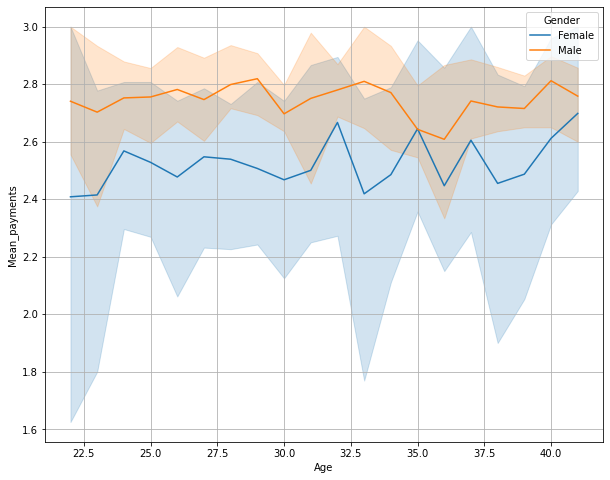

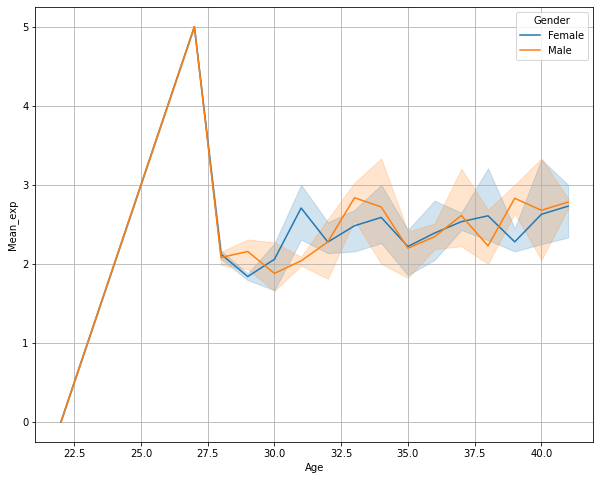

In [324]:
plt.figure(figsize=(10, 8))

pay = datain[['Age', 'PaymentTier', 'City', 'Gender']] \
                .groupby(['Age', 'City', 'Gender'], as_index=False).mean()\
                .rename(columns={'PaymentTier': 'Mean_payments'})
sns.lineplot(data= pay, x= 'Age', y= 'Mean_payments', hue='Gender')
plt.grid()
plt.show()

plt.figure(figsize=(10, 8))
exp = datain[['Age', 'ExperienceInCurrentDomain', 'City', 'Gender']] \
                .groupby(['Age', 'City', 'Gender'], as_index=False).mean()\
                .rename(columns={'ExperienceInCurrentDomain': 'Mean_exp'})

sns.lineplot(data= exp, x= 'Age', y= 'Mean_exp', hue='Gender')
plt.grid()
plt.show()

<h5> Выводы из графиков: </h5>

Средняя зарплата:

    - Средняя запралата женщин ниже мужчин.
    - Средняя зарпалата не зависит от возраста
    - Есть существенные различия в разбросе зарплат мужчин и женщин (ширина полей вокруг графиков)
    
    
Средний опыт:
    
    - Графики опыта мужчин и женщин совпадают, нет существенных различий.
    - Есть возможная аномалия на промежутке 22.5 - 28 лет, возможно мало специалистов с высоким грейдом
    
    